In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset=pd.read_excel('gold.xlsx')

In [13]:
dataset.head()

,Date,interest rate,GVA,Inflation,Price gold
0,1995-11-06,0.12,NaN,0.0498,13275.71
1,1995-11-07,0.12,NaN,0.0498,13294.83
2,1995-11-08,0.12,NaN,0.0498,13198.63
3,1995-11-09,0.12,NaN,0.0498,13284.42
4,1995-11-10,0.12,NaN,0.0498,13444.02


<AxesSubplot:>

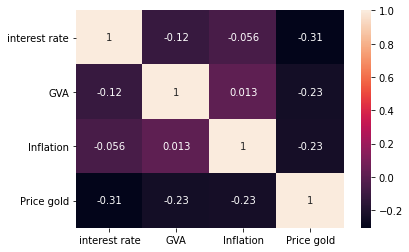

In [18]:
sns.heatmap(dataset.corr(),annot=True)

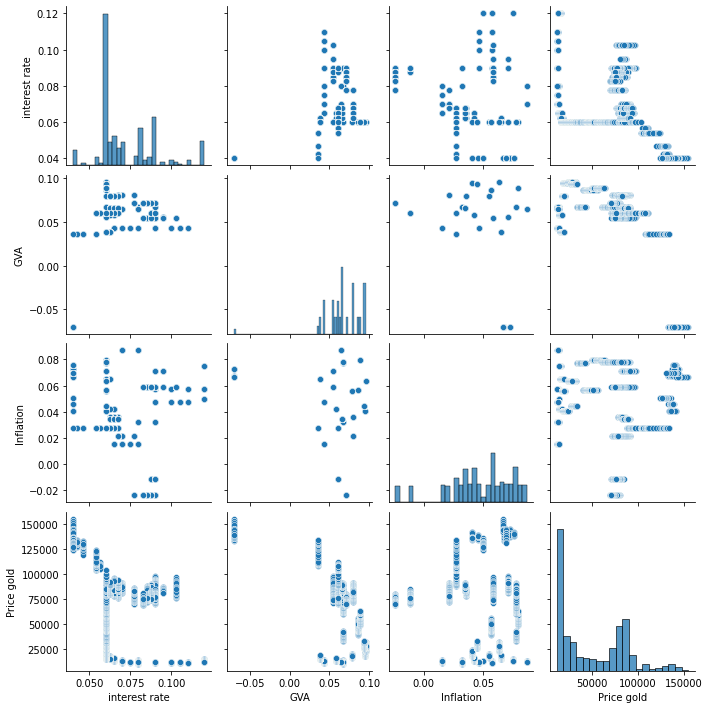

In [19]:
sns.pairplot(dataset)

In [20]:
dataset.describe()

,interest rate,GVA,Inflation,Price gold
count,6293.000000,5630.000000,6293.000000,6293.000000
mean,0.072305,0.066454,0.047255,49384.086700
std,0.018289,0.022540,0.026956,36137.636464
min,0.040000,-0.070000,-0.024100,10924.750000
25%,0.060000,0.055000,0.031900,14679.980000
50%,0.065000,0.066800,0.049800,37666.240000
75%,0.085000,0.080300,0.067300,81624.680000
max,0.120000,0.095700,0.087000,154901.870000


In [22]:
dataset['GVA']=dataset['GVA'].fillna(dataset['GVA'].median())

In [23]:
dataset.head()

,Date,interest rate,GVA,Inflation,Price gold
0,1995-11-06,0.12,0.0668,0.0498,13275.71
1,1995-11-07,0.12,0.0668,0.0498,13294.83
2,1995-11-08,0.12,0.0668,0.0498,13198.63
3,1995-11-09,0.12,0.0668,0.0498,13284.42
4,1995-11-10,0.12,0.0668,0.0498,13444.02


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6293 entries, 0 to 6292
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6293 non-null   datetime64[ns]
 1   interest rate  6293 non-null   float64       
 2   GVA            6293 non-null   float64       
 3   Inflation      6293 non-null   float64       
 4   Price gold     6293 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.9 KB


In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import accuracy_score,r2_score

In [30]:
x=dataset.drop(['Date','Price gold'],axis=1)
y=dataset['Price gold']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [35]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
y_pred_lm=linear_model.predict(x_test)
lm_score=r2_score(y_test,y_pred_lm)
print(lm_score)

0.19921586929300528


In [37]:
lasso_model=Lasso()
score_lasso=cross_val_score(lasso_model,x_train,y_train,cv=10)
score_lasso.mean()

0.21325679341070072

In [38]:
ridge_model=Ridge()
score_ridge=cross_val_score(ridge_model,x_train,y_train,cv=10)
score_ridge.mean()

0.18040862034194674

In [39]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
score_dt=cross_val_score(dt_model,x_train,y_train,cv=10)
score_dt.mean()

0.9933069326655224

[Text(115.0875, 208.38, 'X[0] <= 0.058\nmse = 1315477899.591\nsamples = 4405\nvalue = 49446.971'),
 Text(44.91219512195122, 190.26, 'X[0] <= 0.05\nmse = 197293408.347\nsamples = 294\nvalue = 125895.704'),
 Text(32.66341463414634, 172.14, 'X[2] <= 0.059\nmse = 45481490.873\nsamples = 185\nvalue = 135581.589'),
 Text(20.414634146341463, 154.01999999999998, 'X[2] <= 0.048\nmse = 23746190.513\nsamples = 103\nvalue = 131314.514'),
 Text(16.33170731707317, 135.89999999999998, 'X[0] <= 0.041\nmse = 22940318.069\nsamples = 69\nvalue = 132745.188'),
 Text(8.165853658536586, 117.77999999999999, 'X[2] <= 0.034\nmse = 5493446.177\nsamples = 32\nvalue = 136848.697'),
 Text(4.082926829268293, 99.66, 'mse = 41209.0\nsamples = 2\nvalue = 133701.19'),
 Text(12.24878048780488, 99.66, 'X[2] <= 0.043\nmse = 5152444.854\nsamples = 30\nvalue = 137058.531'),
 Text(8.165853658536586, 81.53999999999999, 'mse = 8069295.07\nsamples = 14\nvalue = 137219.639'),
 Text(16.33170731707317, 81.53999999999999, 'mse = 25

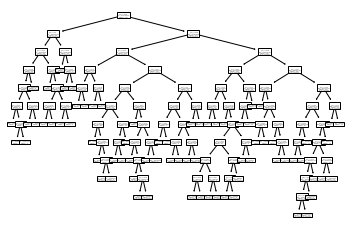

In [42]:
from sklearn.tree import plot_tree
plot_tree(dt_model.fit(x_train,y_train))

In [43]:
y_pred_dt=dt_model.predict(x_test)

In [44]:
score=r2_score(y_test,y_pred_dt)

In [45]:
score

0.9938894855169482

In [56]:
x_1=[[0.04,0.02,0.04]]

In [57]:
dt_model.predict(x_1)

array([137219.63928571])

In [62]:
x_12=[[0.045,-0.077,0.0224]]
dt_model.predict(x_12)

array([128361.99625])

In [63]:
import pickle

In [64]:
file=open('model.pkl','wb')
pickle.dump(dt_model,file)

In [66]:
score_dt

array([0.99197087, 0.99423529, 0.99401725, 0.99285704, 0.99358379,
       0.99282705, 0.99509976, 0.99170276, 0.99268814, 0.99408738])